# Biological question: Are there differences in the binding distance of the same TF-pair in different clusters? - PART2
#### Exemplary Data: 

### Outline of this notebook:
This notbook presents the second part of the analysis if there is a difference in the binding distnace of the same TF-pair in different clusters. If you have not done the PART 1 first, do the PART 1 first. Here the second cluster is analysed. The results of the first cluster are then imprted, merged together and the comparison of the binding distance are done. 
    1. Implementation of distance analysis for second cluster and transfering in dataframe
    2. Importing the results of the first cluster
    3. Merging the results of first and second cluster
    4. Comparing the binding distances between the same TF-pairs in the two clusters.

## 1. Implementation of distance analysis for cluster
0. Creating folders for the structure if necessary
1. Read in path of the the pkl file from already performed market basket analysis (alternative: perform normal market basket analysis) (-> adjust for cluster)
2. selecting of TF-pairs
3. performing distance analysis with considering the noisiness (lower noise, "clearer/better" analysis)
4. Saving results with peak height above 2.8 of cluster in dataframe df_distance_clusterPART2

In [1]:
# The following lines, initally check if all file/paths are available. 
#If a result folder does not exist it is created automatically
import os
import pathlib
if not os.path.exists("./results/distanceresultsfordifference/"):
     pathlib.Path("./results/distanceresultsfordifference/").mkdir(parents=True, exist_ok=True)
        
if not os.path.exists("./results/differencedistance_distributionplot/"):
     pathlib.Path("./results/differencedistance_distributionplot/").mkdir(parents=True, exist_ok=True)

if not os.path.exists("./results/differencedistance_plot/"):
     pathlib.Path("./results/differencedistance_plot/").mkdir(parents=True, exist_ok=True)

if not os.path.exists("./results/differencedistance_table/"):
     pathlib.Path("./results/differencedistance_table/").mkdir(parents=True, exist_ok=True)


In [2]:
import tfcomb.objects
clusterPART2_object = tfcomb.objects.CombObj().from_pickle("/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/analyse/results/wp1/main/heart_lv/heart_lv.4.Natural_killer_T_(NKT)_cell.pkl")
clusterPART2_object

<CombObj: 9981069 TFBS (746 unique names) | Market basket analysis: 549932 rules>

In [3]:
clusterPART2_object.simplify_rules()

INFO: x_threshold is None; trying to calculate optimal threshold
INFO: y_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of TFBS and rules using thresholds


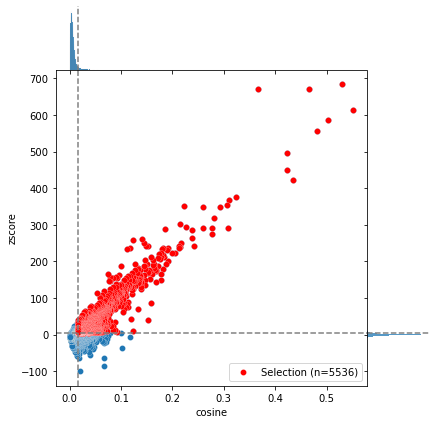

In [4]:
clusterPART2_object_selected = clusterPART2_object.select_significant_rules()

In [5]:
clusterPART2_object_selected.analyze_distances(threads=6)

INFO: DistObject successfully created! It can be accessed via combobj.distObj
INFO: Calculating distances
INFO: Normalizing data.
INFO: Done finding distances! Results are found in .distances
INFO: Run .linregress_all() to fit linear regression
INFO: Fitting linear regression. With number of threads: 6
INFO: Linear regression finished! Results can be found in .linres
INFO: Correcting background with 6 threads.
INFO: Background correction finished! Results can be found in .corrected
INFO: Smoothing signals with window size 3
INFO: Shifting signals above zero
INFO: Analyzing Signal with threads 6
INFO: Done analyzing signal. Results are found in .peaks


In [6]:
clusterPART2_object_selected.distObj.evaluate_noise(threads=6)
clusterPART2_object_selected.distObj.rank_rules()

INFO: Evaluating noisiness of the signals with 6 threads


In [7]:
df_distance_clusterPART2=clusterPART2_object_selected.distObj.peaks

In [8]:
df_distance_clusterPART2=df_distance_clusterPART2[(df_distance_clusterPART2["Peak Heights"]>2.8)]
df_distance_clusterPART2

,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank
8082,RARA,SP9,52,6.414142,6.678130,2,694,0.759366,0.006261,135.0,61.0,44.0,80.000000
8081,RARA,SP8,52,6.431106,6.699931,2,697,0.741750,0.005796,159.0,58.0,39.0,85.333333
8302,Rarg,TBX15,41,6.481263,6.698329,2,2622,0.819985,0.011571,77.0,50.0,195.0,107.333333
8304,Rarg,TBX5,41,6.481263,6.698329,2,2622,0.819985,0.011571,77.0,50.0,195.0,107.333333
8303,Rarg,TBX4,41,6.481263,6.698329,2,2622,0.819985,0.011571,77.0,50.0,195.0,107.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,ASCL1var.2,ZNF148,61,2.883665,4.355015,2,907,0.050717,0.292448,5447.0,4104.0,4461.0,4670.666667
813,Arid3a,RAX,77,2.945231,4.323685,2,1486,0.049798,0.31966,5502.0,3945.0,4587.0,4678.000000
692,Arid3a,JDP2,58,2.856966,4.346334,2,1974,0.048126,0.292688,5600.0,4194.0,4464.0,4752.666667
5609,KLF4,MYC,100,2.946405,2.946405,2,223,0.035874,0.280216,5958.0,3940.0,4379.0,4759.000000


## 2. Importing the results of the first cluster

In [9]:
import pandas as pd

In [61]:
df_distance_clusterPART1_csv=pd.read_csv("./results/distanceresultsfordifference/distance_heart_lv_2.Natural_killer_T_(NKT)_cell.csv")
df_distance_clusterPART1_csv

,Unnamed: 0,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank
0,7968,RARA,SP9,52,6.398584,6.664683,2,755,0.754967,0.005907,141.0,61.0,38.0,80.000000
1,7967,RARA,SP8,52,6.416077,6.686614,2,756,0.738095,0.006484,167.0,59.0,54.0,93.333333
2,8182,Rarg,TBX1,41,6.499230,6.716822,2,2715,0.812523,0.011781,93.0,47.0,190.0,110.000000
3,8183,Rarg,TBX15,41,6.499230,6.716822,2,2715,0.812523,0.011781,93.0,47.0,190.0,110.000000
4,8184,Rarg,TBX4,41,6.499230,6.716822,2,2715,0.812523,0.011781,93.0,47.0,190.0,110.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,7863,Plagl1,RREB1,0,2.824130,2.824130,2,580,0.041379,0.257859,5952.0,4266.0,4116.0,4778.000000
4991,7778,POU4F1,Pou5f1Sox2,100,2.812432,2.812432,2,423,0.028369,0.247095,6106.0,4302.0,3992.0,4800.000000
4992,1317,BATFJUN,POU4F1,0,2.924423,2.924423,2,358,0.041899,0.342254,5938.0,3946.0,4588.0,4824.000000
4993,2351,ETV1,SPIB,87,2.811977,3.208440,2,1009,0.045590,0.291360,5798.0,4305.0,4391.0,4831.333333


 ## 3. Merging the results of first and second cluster

In [30]:
df_distancedifference_2clusters=df_distance_clusterPART1_csv.merge(df_distance_clusterPART2,suffixes=('_CPART1', '_CPART2'), left_on =["TF1","TF2"], right_on = ["TF1","TF2"])
df_distancedifference_2clusters

,Unnamed: 0,TF1,TF2,Distance_CPART1,Peak Heights_CPART1,Prominences_CPART1,Threshold_CPART1,TF1_TF2_count_CPART1,Distance_percent_CPART1,Noisiness_CPART1,rank_Distance_percent_CPART1,rank_Peak Heights_CPART1,rank_Noisiness_CPART1,mean_rank_CPART1,Distance_CPART2,Peak Heights_CPART2,Prominences_CPART2,Threshold_CPART2,TF1_TF2_count_CPART2,Distance_percent_CPART2,Noisiness_CPART2,rank_Distance_percent_CPART2,rank_Peak Heights_CPART2,rank_Noisiness_CPART2,mean_rank_CPART2
0,7968,RARA,SP9,52,6.398584,6.664683,2,755,0.754967,0.005907,141.0,61.0,38.0,80.000000,52,6.414142,6.678130,2,694,0.759366,0.006261,135.0,61.0,44.0,80.000000
1,7967,RARA,SP8,52,6.416077,6.686614,2,756,0.738095,0.006484,167.0,59.0,54.0,93.333333,52,6.431106,6.699931,2,697,0.741750,0.005796,159.0,58.0,39.0,85.333333
2,8182,Rarg,TBX1,41,6.499230,6.716822,2,2715,0.812523,0.011781,93.0,47.0,190.0,110.000000,41,6.481263,6.698329,2,2622,0.819985,0.011571,77.0,50.0,195.0,107.333333
3,8183,Rarg,TBX15,41,6.499230,6.716822,2,2715,0.812523,0.011781,93.0,47.0,190.0,110.000000,41,6.481263,6.698329,2,2622,0.819985,0.011571,77.0,50.0,195.0,107.333333
4,8184,Rarg,TBX4,41,6.499230,6.716822,2,2715,0.812523,0.011781,93.0,47.0,190.0,110.000000,41,6.481263,6.698329,2,2622,0.819985,0.011571,77.0,50.0,195.0,107.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5366,5601,KLF4,TFAP2B,0,2.936341,2.936341,2,358,0.044693,0.315213,5846.0,3917.0,4522.0,4761.666667,0,3.820388,3.820388,2,362,0.046961,0.289934,5664.0,2463.0,4439.0,4188.666667
5367,7778,POU4F1,Pou5f1Sox2,100,2.812432,2.812432,2,423,0.028369,0.247095,6106.0,4302.0,3992.0,4800.000000,100,3.723681,3.723681,2,411,0.029197,0.310486,6006.0,2583.0,4561.0,4383.333333
5368,1317,BATFJUN,POU4F1,0,2.924423,2.924423,2,358,0.041899,0.342254,5938.0,3946.0,4588.0,4824.000000,0,3.931117,3.931117,2,335,0.053731,0.222347,5219.0,2353.0,3659.0,3743.666667
5369,2351,ETV1,SPIB,87,2.811977,3.208440,2,1009,0.045590,0.291360,5798.0,4305.0,4391.0,4831.333333,87,3.002879,3.687456,2,909,0.050605,0.192134,5454.0,3803.0,3114.0,4123.666667


In [62]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', 10)



##  4. Comparing the binding distances between the same TF-pairs in the two clusters.
1. Calculating the difference between the binding distance per TF-pair
2. Calcultating the average peak Height of a TF-pair
3. Only selecting TF-pairs above 100 counts as TF-pairs which are of interest
4. Sorting the dataframe by the difference in the binding distance
5. looking at the distribution of the difference in the binding distance
6. saving the distribution plot of differnce in distance in .png file (-> adjust for cluster)


In [63]:
df_distancedifference_2clusters['Difference between Distance'] = abs(df_distancedifference_2clusters['Distance_CPART1'] - df_distancedifference_2clusters['Distance_CPART2'])
df_distancedifference_2clusters['Average Peak Height'] = ((df_distancedifference_2clusters['Peak Heights_CPART1'] + df_distancedifference_2clusters['Peak Heights_CPART2'])/2)
df_distancedifference_2clusters['TF-pair'] = df_distancedifference_2clusters['TF1'] + " + " + df_distancedifference_2clusters['TF2']
df_distancedifference_2clusters = df_distancedifference_2clusters[(df_distancedifference_2clusters["TF1_TF2_count_CPART1"]>100) &(df_distancedifference_2clusters["TF1_TF2_count_CPART2"]>100)]
df_distancedifference_2clusters_sorted=df_distancedifference_2clusters.sort_values(by=['Difference between Distance'])
df_differencedistance_distribution=df_distancedifference_2clusters_sorted['Difference between Distance'].value_counts()
df_differencedistance_distribution

0     3490
1      308
2       98
32      74
5       46
      ... 
76       1
81       1
92       1
97       1
98       1
Name: Difference between Distance, Length: 94, dtype: int64

In [15]:
df_distancedifference_2clusters_sorted

,Unnamed: 0,TF1,TF2,Distance_CPART1,Peak Heights_CPART1,Prominences_CPART1,Threshold_CPART1,TF1_TF2_count_CPART1,Distance_percent_CPART1,Noisiness_CPART1,rank_Distance_percent_CPART1,rank_Peak Heights_CPART1,rank_Noisiness_CPART1,mean_rank_CPART1,Distance_CPART2,Peak Heights_CPART2,Prominences_CPART2,Threshold_CPART2,TF1_TF2_count_CPART2,Distance_percent_CPART2,Noisiness_CPART2,rank_Distance_percent_CPART2,rank_Peak Heights_CPART2,rank_Noisiness_CPART2,mean_rank_CPART2,Difference between Distance,Average Peak Height,TF-pair
0,7968,RARA,SP9,52,6.398584,6.664683,2,755,0.754967,0.005907,141.0,61.0,38.0,80.000000,52,6.414142,6.678130,2,694,0.759366,0.006261,135.0,61.0,44.0,80.000000,0,6.406363,RARA + SP9
3286,3850,FOXO6,LMX1B,37,4.515938,5.753527,2,726,0.093664,0.150234,2874.0,1856.0,2425.0,2385.000000,37,4.601366,5.690514,2,691,0.092619,0.142564,2869.0,1775.0,2348.0,2330.666667,0,4.558652,FOXO6 + LMX1B
3287,3681,FOXL1,LMX1B,37,4.515938,5.753527,2,726,0.093664,0.150234,2874.0,1856.0,2425.0,2385.000000,37,4.601366,5.690514,2,691,0.092619,0.142564,2869.0,1775.0,2348.0,2330.666667,0,4.558652,FOXL1 + LMX1B
3288,3787,FOXO4,LMX1B,37,4.515938,5.753527,2,726,0.093664,0.150234,2874.0,1856.0,2425.0,2385.000000,37,4.601366,5.690514,2,691,0.092619,0.142564,2869.0,1775.0,2348.0,2330.666667,0,4.558652,FOXO4 + LMX1B
3289,3941,FOXP3,LMX1B,37,4.515938,5.753527,2,726,0.093664,0.150234,2874.0,1856.0,2425.0,2385.000000,37,4.601366,5.690514,2,691,0.092619,0.142564,2869.0,1775.0,2348.0,2330.666667,0,4.558652,FOXP3 + LMX1B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,5785,KLF5,Zic2,100,3.051282,3.051282,2,748,0.037433,0.209312,6027.0,3665.0,3403.0,4365.000000,0,2.825565,2.825565,2,700,0.040000,0.173464,5903.0,4295.0,2789.0,4329.000000,100,2.938423,KLF5 + Zic2
4760,6725,MIXL1,PHOX2B,100,3.358690,3.358690,2,318,0.025157,0.222222,6127.0,3113.0,3632.0,4290.666667,0,3.204209,3.204209,2,296,0.064189,0.208958,4385.0,3356.0,3402.0,3714.333333,100,3.281450,MIXL1 + PHOX2B
4231,1704,CTCFL,SP1,100,3.014408,3.014408,2,324,0.030864,0.171688,6090.0,3731.0,2756.0,4192.333333,0,5.182683,5.182683,2,315,0.060317,0.124056,4683.0,1333.0,2116.0,2710.666667,100,4.098546,CTCFL + SP1
4759,6724,MIXL1,PHOX2B,0,4.140590,4.140590,2,318,0.062893,0.222222,4473.0,2169.0,3632.0,3424.666667,100,3.285982,3.285982,2,296,0.023649,0.208958,6041.0,3202.0,3402.0,4215.000000,100,3.713286,MIXL1 + PHOX2B


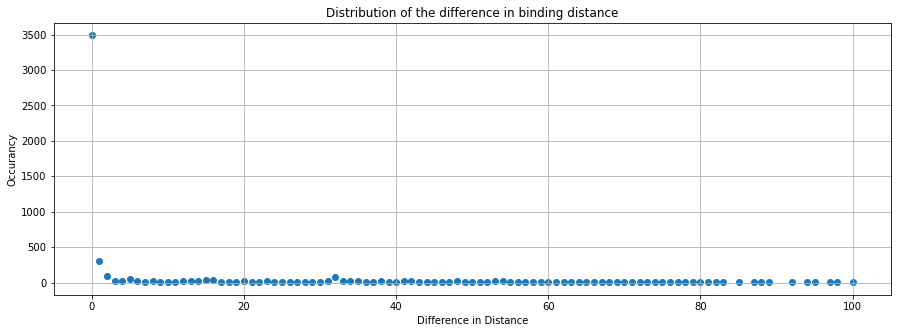

In [65]:
import matplotlib.pyplot as plt

differencedistance = df_differencedistance_distribution.keys()
occurancy = df_differencedistance_distribution

plt.figure(figsize=(15, 5))
plt.scatter(differencedistance,occurancy)
plt.xticks
plt.grid(True)
plt.xlabel('Difference in Distance')
plt.ylabel('Occurancy')
plt.title('Distribution of the difference in binding distance')

#plt.savefig("./results/differencedistance_distributionplot/heart_lv_2.Natural_killer_T_(NKT)_cell_4.Natural_killer_T_(NKT)_cell.png") 
plt.show()

7. Selecting the difference in binding distance over 10
8. Sorting the TF-Pairs by noisiness of the first cluster and selecting the first 100 to show in the plot
9. Sorting the TF-Pairs by Difference between Distance and saving table in .csv file (-> adjust for cluster)
10. plotting the differnce in distance over the TF-pairs and also saving them in a .png file (-> adjust for cluster)

In [59]:
df_distancedifference_2clusters_withoutlowdifference = df_distancedifference_2clusters[(df_distancedifference_2clusters["Difference between Distance"]>10)]
df_distancedifference_2clusters_withoutlowdifference_noisinesstop100=df_distancedifference_2clusters_withoutlowdifference.sort_values(by=['Noisiness_CPART1']).head(100)
df_distancedifference_2clusters_withoutlowdifference_noisinesstop100_sorted=df_distancedifference_2clusters_withoutlowdifference_noisinesstop100.sort_values(by=['Difference between Distance'])
df_distancedifference_2clusters_withoutlowdifference_noisinesstop100_sorted


,Unnamed: 0,TF1,TF2,Distance_CPART1,Peak Heights_CPART1,Prominences_CPART1,Threshold_CPART1,TF1_TF2_count_CPART1,Distance_percent_CPART1,Noisiness_CPART1,rank_Distance_percent_CPART1,rank_Peak Heights_CPART1,rank_Noisiness_CPART1,mean_rank_CPART1,Distance_CPART2,Peak Heights_CPART2,Prominences_CPART2,Threshold_CPART2,TF1_TF2_count_CPART2,Distance_percent_CPART2,Noisiness_CPART2,rank_Distance_percent_CPART2,rank_Peak Heights_CPART2,rank_Noisiness_CPART2,mean_rank_CPART2,Difference between Distance,Average Peak Height,TF-pair
2164,6971,NFIB,ZNF135,17,2.823818,3.464928,2,2943,0.180088,0.025351,1842.0,4267.0,683.0,2264.000000,28,3.977412,4.524050,2,2855,0.241681,0.026702,1410.0,2296.0,718.0,1474.666667,11,3.400615,NFIB + ZNF135
1547,136,ASCL1var.2,RHOXF1,0,3.942424,3.942424,2,427,0.196721,0.024583,1733.0,2391.0,655.0,1593.000000,16,4.674049,5.219334,2,417,0.434053,0.024729,866.0,1716.0,643.0,1075.000000,16,4.308236,ASCL1var.2 + RHOXF1
1546,137,ASCL1var.2,RHOXF1,16,4.639957,5.188082,2,427,0.435597,0.024583,886.0,1762.0,655.0,1101.000000,0,3.754411,3.754411,2,417,0.187050,0.024729,1755.0,2542.0,643.0,1646.666667,16,4.197184,ASCL1var.2 + RHOXF1
1551,127,ASCL1var.2,PITX2,0,3.942424,3.942424,2,427,0.196721,0.024583,1733.0,2391.0,655.0,1593.000000,16,4.674049,5.219334,2,417,0.434053,0.024729,866.0,1716.0,643.0,1075.000000,16,4.308236,ASCL1var.2 + PITX2
1550,128,ASCL1var.2,PITX2,16,4.639957,5.188082,2,427,0.435597,0.024583,886.0,1762.0,655.0,1101.000000,0,3.754411,3.754411,2,417,0.187050,0.024729,1755.0,2542.0,643.0,1646.666667,16,4.197184,ASCL1var.2 + PITX2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,8172,Rarb,ZNF460,11,5.670983,6.086662,2,12073,0.521246,0.011362,651.0,848.0,176.0,558.333333,91,2.969394,3.014662,2,11797,0.294821,0.011433,1203.0,3883.0,190.0,1758.666667,80,4.320188,Rarb + ZNF460
1492,6468,MEF2A,NFIB,5,4.828706,5.319871,2,1622,0.363132,0.020614,1039.0,1624.0,510.0,1057.666667,85,3.814802,3.994474,2,1555,0.291961,0.017566,1210.0,2469.0,400.0,1359.666667,80,4.321754,MEF2A + NFIB
1430,6606,MEF2D,NFIB,7,4.842467,5.274216,2,1275,0.396863,0.018941,974.0,1609.0,453.0,1012.000000,87,3.853009,4.063068,2,1234,0.323339,0.012381,1109.0,2426.0,221.0,1252.000000,80,4.347738,MEF2D + NFIB
341,7205,NR2F1,ZNF460,95,3.056085,3.056085,2,2754,0.291939,0.013710,1228.0,3653.0,255.0,1712.000000,10,5.884388,6.299197,2,2705,0.508318,0.014224,671.0,402.0,288.0,453.666667,85,4.470237,NR2F1 + ZNF460


In [18]:
#df_distancedifference_2clusters_withoutlowdifference_noisinesstop100_sorted.to_csv("./analyse/results/differencedistance_table/heart_lv_2.Natural_killer_T_(NKT)_cell_4.Natural_killer_T_(NKT)_cell.csv")

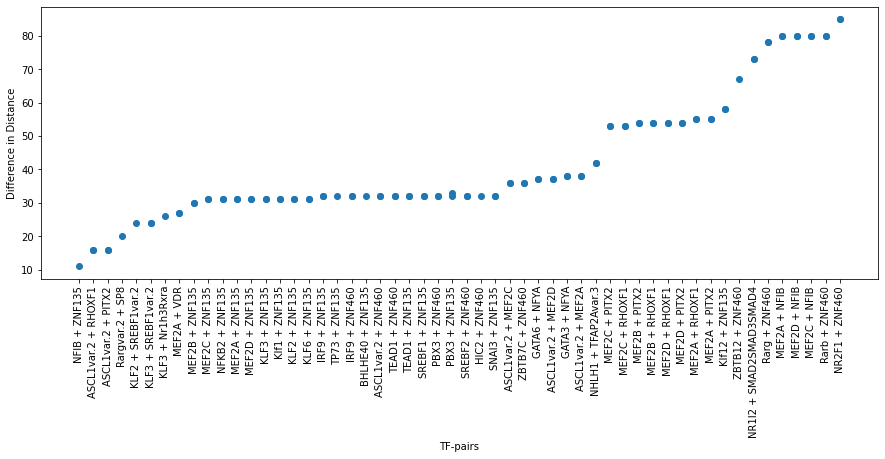

In [60]:
differencedistance = df_distancedifference_2clusters_withoutlowdifference_noisinesstop100_sorted['Difference between Distance']
TFpairs = df_distancedifference_2clusters_withoutlowdifference_noisinesstop100_sorted['TF-pair']

plt.figure(figsize=(15, 5))
plt.scatter(TFpairs,differencedistance)
plt.xticks(rotation='vertical')
#plt.grid(True)
plt.xlabel('TF-pairs')
plt.ylabel('Difference in Distance')

#plt.savefig("./results/differencedistance_plot/heart_lv_2.Natural_killer_T_(NKT)_cell_4.Natural_killer_T_(NKT)_cell.png") 
plt.show()